In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import spacy 
import os

%matplotlib inline

In [2]:
# setting directory
os.getcwd()

'C:\\Users\\khesali\\Dropbox\\projects\\in_progross\\text_analysis_constitution\\notebooks'

In [3]:
# loading the large model from spacy
nlp = spacy.load('en_core_web_lg')

**file reader function** 

In [4]:
# function for reading txt files from a certain directory
def file_reader(directory):
    """
    The function reads all txt files in the given directory, reads them and return a dictionary, with names of file
    as keys and texts as values.
    :param directory:
    :return: a dictionary of texts
    """
    import os
    name_list = []
    dict_text = {}
    for file in os.listdir(path=directory):
        name_list.append(file)
    for name in name_list:
        with open('{}\\{}'.format(directory, name), 'r', encoding='utf-8', errors='ignore') as file:
            text = file.read().replace("\n\n", " ")
            dict_text[name.strip(".txt")] = text
    return dict_text

dic_preamble = file_reader(r'preamble')

In [5]:
# feeding documents to the model


dic_preamble_spacy = {}
for name, text in dic_preamble.items(): 
    doc = nlp(text)
    dic_preamble_spacy[name] = doc

In [6]:
list_tense= []
present_tense = 0 
past_tense = 0 
total_number_verb = 0 
dic_tense = []
for key, value in dic_preamble_spacy.items(): 
    our_dic = {"name":"", "present_tense":0, "past_tense":0,"difference":0}
    list_tense = []
    present_tense = 0 
    past_tense = 0 
    total_number_verb = 0 
    for token in value:
         if token.pos_ == "VERB": 
            total_number_verb += 1
            tense = token.morph.get("Tense")
            list_tense.append(tense)

    for e in list_tense: 
        for n in e: 
            if n == "Pres": 
                present_tense += 1 
            elif n == "Past": 
                past_tense +=1 
            else: 
                pass
    our_dic["name"] = key
    our_dic["present_tense"] = present_tense
    our_dic["past_tense"] = past_tense
    our_dic["difference"] = present_tense - past_tense
    dic_tense.append(our_dic)
    print(our_dic)
df_tense = pd.DataFrame(dic_tense)

{'name': '100_Colombia_1991_updated_2019_20', 'present_tense': 2, 'past_tense': 2, 'difference': 0}
{'name': '101_Venezuela_1999_updated_2010_1', 'present_tense': 10, 'past_tense': 0, 'difference': 10}
{'name': '130_Ecuador_2008_updated_2018_3', 'present_tense': 9, 'past_tense': 2, 'difference': 7}
{'name': '135_Peru_1993_updated_2019_10', 'present_tense': 5, 'past_tense': 1, 'difference': 4}
{'name': '140_Brazil_1988_updated_2017_26', 'present_tense': 2, 'past_tense': 4, 'difference': -2}
{'name': '145_Bolivia_2009_updated', 'present_tense': 9, 'past_tense': 16, 'difference': -7}
{'name': '150_Paraguay_1992_updated_2011_1', 'present_tense': 6, 'past_tense': 0, 'difference': 6}
{'name': '160_Argentina_1972_updated_1994_4', 'present_tense': 8, 'past_tense': 1, 'difference': 7}
{'name': '205_Ireland_1937_updated_2004_16', 'present_tense': 3, 'past_tense': 6, 'difference': -3}
{'name': '20_Canada_1867_updated_2011_31', 'present_tense': 1, 'past_tense': 5, 'difference': -4}
{'name': '220_F

Text(0.5, 1.0, 'The difference between verbs in present \ntense and past tense in preamble of constitutions')

<Figure size 1080x576 with 0 Axes>

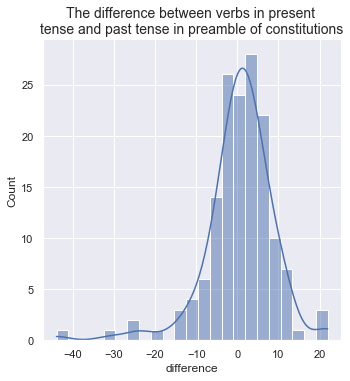

In [7]:
sns.set_theme()
plt.figure(figsize = (15,8))
sns.displot(x='difference', data=df_tense,  kde=True)
plt.title("""The difference between verbs in present 
tense and past tense in preamble of constitutions""",
          loc = 'center', fontsize = 14)
# plt.savefig("interesting.jpg", bbox_inches='tight', pad_inches = 0.75, dpi=400)



**Majority of constitutions have similar numbers of past tense and present tense verbs.**

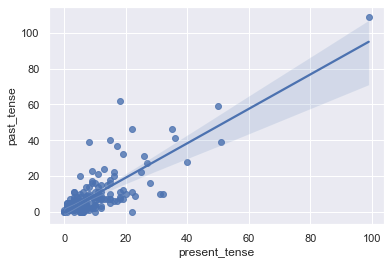

In [8]:
plot_2 = sns.regplot(x="present_tense", y="past_tense", data=df_tense)

**It seems that writers of constitutions try to keep a balance between past tense sentences and present tense sentences.**

In [9]:
# defining a function to split the string variables
def variable_name_splitter(dataframe, original_variable_name, list_variables_name):
    dataframe[list_variables_name] = dataframe['{}'.format(original_variable_name)].str.split("_", expand=True)
    return dataframe

# splitting the variable name into its components
df_tense_1 = variable_name_splitter(dataframe=df_tense,
                                    original_variable_name='name',
                                    list_variables_name=["ccode", "cname", "year", "update", "last_year", "rest"])

In [16]:
# creating a categorical variable based on the variable difference, constitutions with a positive value are forward-looking constitutions and constitutions with a negative value are backward-looking.
conditions =[(df_tense_1['difference'] > 0),
               (df_tense_1['difference'] == 0),
               (df_tense_1['difference'] < 0)
]

values = ['forward', 'equal', 'backward']
df_tense_1['direction'] = np.select(conditions, values)
df_tense_1['ccode'] = df_tense_1['ccode'].astype('int')

In [17]:
df_tense_1

,name,present_tense,past_tense,difference,ccode,cname,year,update,last_year,rest,direction
0,100_Colombia_1991_updated_2019_20,2,2,0,100,Colombia,1991,updated,2019,20,equal
1,101_Venezuela_1999_updated_2010_1,10,0,10,101,Venezuela,1999,updated,2010,1,forward
2,130_Ecuador_2008_updated_2018_3,9,2,7,130,Ecuador,2008,updated,2018,3,forward
3,135_Peru_1993_updated_2019_10,5,1,4,135,Peru,1993,updated,2019,10,forward
4,140_Brazil_1988_updated_2017_26,2,4,-2,140,Brazil,1988,updated,2017,26,backward
...,...,...,...,...,...,...,...,...,...,...,...
148,95_Panama_1972_updated_2004_5,3,0,3,95,Panama,1972,updated,2004,5,forward
149,970_Nauru_1968_updated,3,2,1,970,Nauru,1968,updated,None,None,forward
150,983_Marshall Islands_1979_updated_1995_2,15,5,10,983,Marshall Islands,1979,updated,1995,2,forward
151,986_Palau_1981_updated_1992_1,5,0,5,986,Palau,1981,updated,1992,1,forward


In [18]:
# reading a dataset about cosine similarity between the present constitutions and their predecessors
df_similarity = pd.read_csv(r'similarity.csv', delimiter=",")
df_similarity

,ccode,COS_SIM
0,100,0.390518
1,101,0.481578
2,130,0.914884
3,135,0.926329
4,140,0.903697
...,...,...
148,95,0.588575
149,970,NaN
150,983,NaN
151,986,NaN


In [19]:
# merging two datasets on country code and dropping observations with missing value

df_final = pd.merge(left=df_tense_1,
                    right=df_similarity,
                    on='ccode'

)
df_final.dropna(inplace=True)

In [20]:
df_final

,name,present_tense,past_tense,difference,ccode,cname,year,update,last_year,rest,direction,COS_SIM
0,100_Colombia_1991_updated_2019_20,2,2,0,100,Colombia,1991,updated,2019,20,equal,0.390518
1,101_Venezuela_1999_updated_2010_1,10,0,10,101,Venezuela,1999,updated,2010,1,forward,0.481578
2,130_Ecuador_2008_updated_2018_3,9,2,7,130,Ecuador,2008,updated,2018,3,forward,0.914884
3,135_Peru_1993_updated_2019_10,5,1,4,135,Peru,1993,updated,2019,10,forward,0.926329
4,140_Brazil_1988_updated_2017_26,2,4,-2,140,Brazil,1988,updated,2017,26,backward,0.903697
...,...,...,...,...,...,...,...,...,...,...,...,...
141,92_El Salvador_1983_updated_2014_10,1,5,-4,92,El Salvador,1983,updated,2014,10,backward,0.913555
142,935_Vanuatu_1980_updated_1983_2,2,1,1,935,Vanuatu,1980,updated,1983,2,forward,0.991427
143,93_Nicaragua_1987_updated_2014_8,6,11,-5,93,Nicaragua,1987,updated,2014,8,backward,0.824239
146,947_Tuvalu_1986_updated_2010_5,7,14,-7,947,Tuvalu,1986,updated,2010,5,backward,0.836988


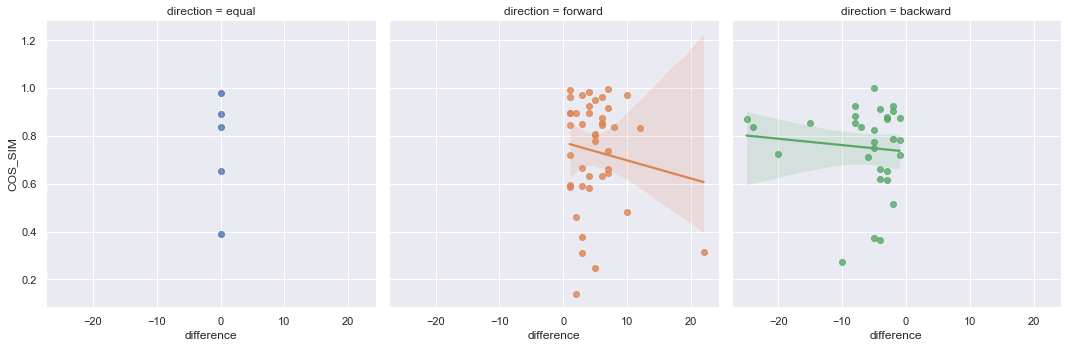

In [21]:
sns.lmplot(x="difference",y="COS_SIM", hue="direction",col= "direction", data=df_final)
# plt.savefig("cosine.jpg", bbox_inches='tight', pad_inches = 0.75, dpi=400)

**A backward looking perspective does not correlate with similarity between a constitution and its predecessor. However, if a constitution is forward-looking, it would be more dissimilar to its predecessor.**